# Bol.com model training - predicting spent money

Exercise:
_"Your task is to create a linear model that predicts the money spent on bol.com per year. Your model should perform well on a hold out test set that I will give you at the end of the exercise."_

In [34]:
# Importing stuff

# Dataframes
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
import math
from math import sqrt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [35]:
# importing datasets
sales = pd.read_csv("bol_sales.csv")
sales_holdout = pd.read_csv("bol_sales_holdout.csv")

We want to predict: money spent on bol.com.
Use the other holdout set to test the data, however, there is no spent_bol column there, we can predict that column with our model.

Let's create some dummies first for gender.

In [37]:
def gender_dummies(x):
    if(x == "female"): 
        return float(0)
    if(x == "male"): 
        return float(1)

sales["gender_dummy"] = sales["gender"].apply(gender_dummies)
sales.tail(3)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,gender_dummy
63,person_64,male,7090,5.9,13,55,80,579,1.0
64,person_65,female,97804,8.5,20,67,29,1515,0.0
65,person_66,female,10337,8.7,12,46,111,827,0.0


Looks good, lets look at the possible relations..

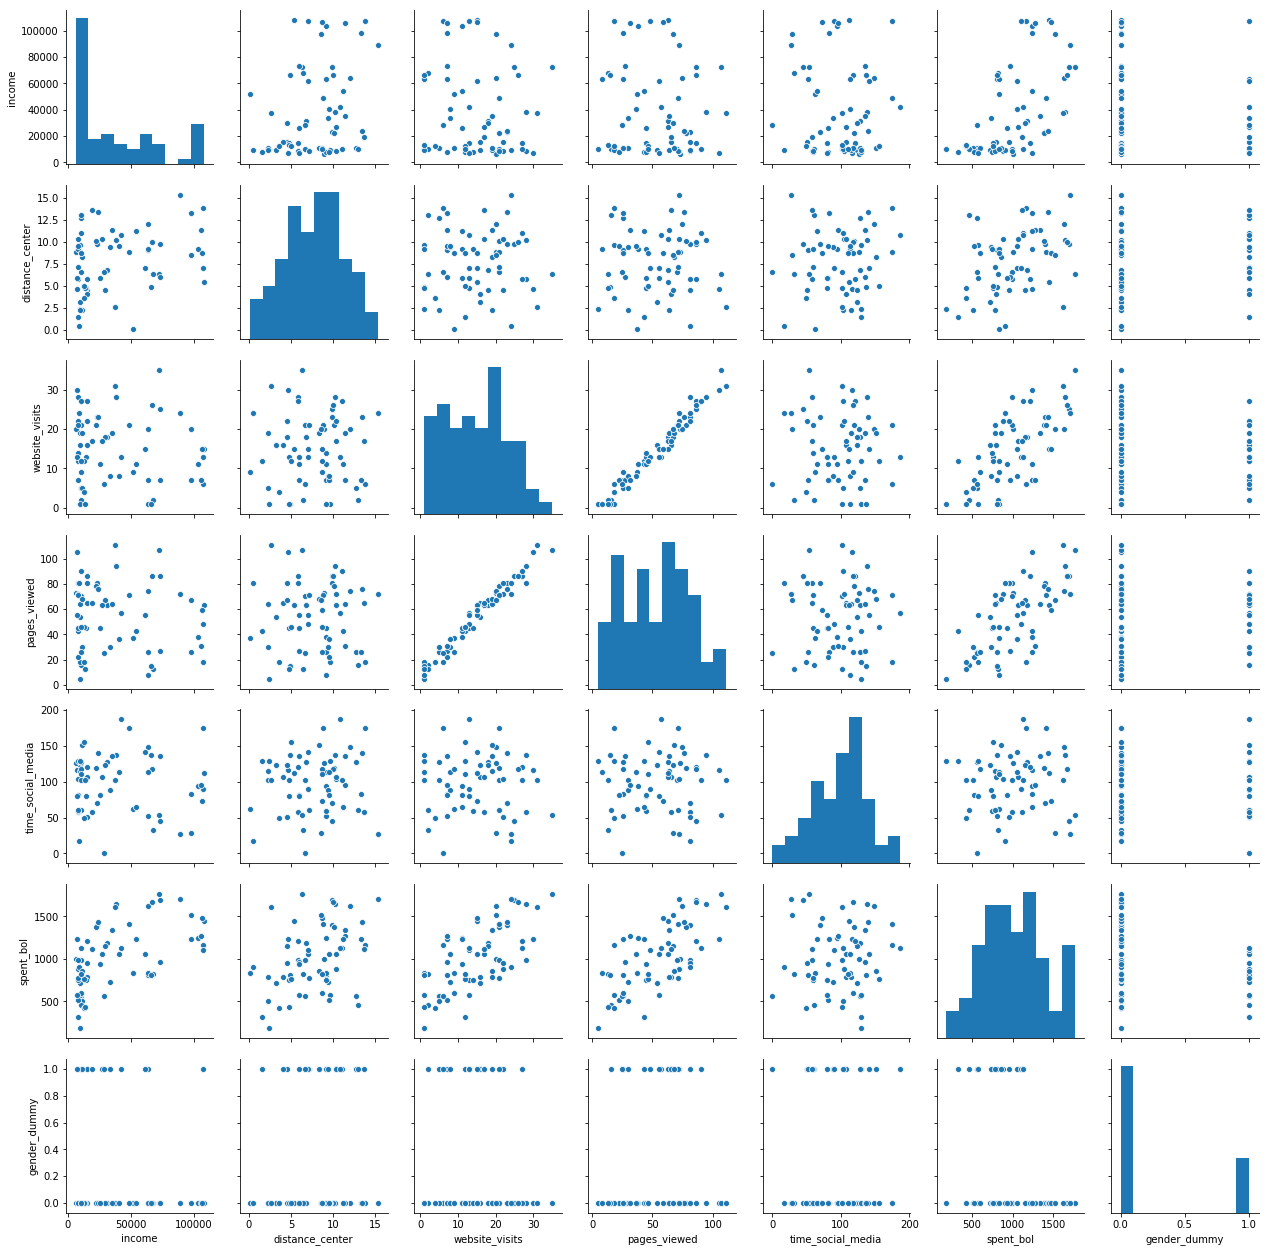

In [5]:
sns.pairplot(sales[["income","distance_center","website_visits","pages_viewed","time_social_media","spent_bol","gender_dummy"]])

We have to look at the regression with spent_bol and some possible linear relations.
Looks like some linear relations might include pages viewed and website visits. Income looks like a plausible log linear relation. Let's visualize those to get deeper insights. 

Also, women seem to spend more than men. Let's run with these variables!

Text(0.5,1,'Website visits VERSUS money spent at bol.com')

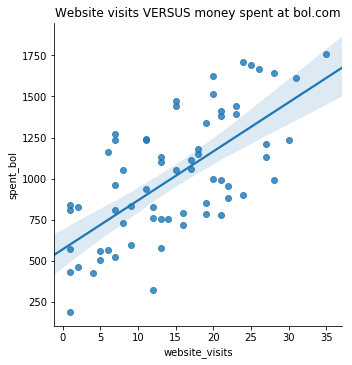

In [6]:
sns.lmplot(x='website_visits', y='spent_bol', data=sales)
plt.title("Website visits VERSUS money spent at bol.com")

Text(0.5,1,'page views VERSUS money spent at bol')

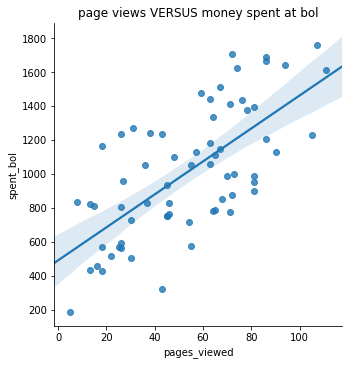

In [7]:
sns.lmplot(x='pages_viewed', y='spent_bol', data=sales)
plt.title("page views VERSUS money spent at bol")

Text(0.5,1,'Log income VS amount spent @ bol')

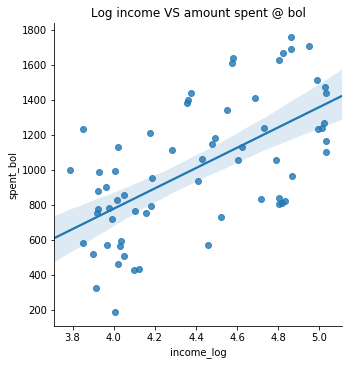

In [38]:
sales['income_log'] = sales['income'].apply(math.log10)
sns.lmplot(x='income_log', y='spent_bol', data=sales)
plt.title("Log income VS amount spent @ bol")

looks more linear for sure. ill take it.

_x = page views, website views, income (log), gender_

_y =  money spent_

In [41]:
# training model with trainings data set
X = sales[['income_log', 'pages_viewed', 'website_visits','gender_dummy']] 
y = sales['spent_bol'] 
lm = LinearRegression(); 
lm.fit(X, y);

# lets check our RMSE for our trainings data set, so we can take a look at what we can predict (and if any overfitting is happening)
y_pred = lm.predict(X)
rms = sqrt(mean_squared_error(y, y_pred))
print(f"RMSE on training dataset: {rms}")

RMSE on training dataset: 95.68858949209113


pretty good, lets look at the test data set and predict values with our model.

In [28]:
def gender_dummies(x):
    if(x == "female"): 
        return float(0)
    if(x == "male"): 
        return float(1)

sales_holdout["gender_dummy"] = sales_holdout["gender"].apply(gender_dummies)

sales_holdout['income_log'] = sales_holdout['income'].apply(math.log10)
X_holdout = sales_holdout[['income_log','pages_viewed','website_visits','gender_dummy']]
y_test_p = lm.predict(X_holdout)

print("predicted money spent on test set for bol.com:")
y_test_p

predicted money spent on test set for bol.com:


array([ 556.46833642, 1094.2356214 ,  315.7176429 , 1031.28791451,
        875.88878819, 1379.24479115,  467.57852704,  581.61183777,
        656.7767371 , 1232.46901173, 1265.14290927,  840.51864206,
       1144.41181514,  729.50324217, 1674.36246315,  970.12663168,
        721.93345983, 1122.75538049,  886.28034741, 1265.41499979,
        438.88262633, 1011.16054225, 1676.60930781, 1070.62208739,
       1226.51136042, 1110.50077039,  809.49689701, 1138.88096992,
        516.48875563,  854.04642175,  907.92941072, 1045.80100809,
        174.78065267])

lets see how much they differ from the real values by using the real dataset which includes the real money spent values

In [40]:
sales_holdout_answers = pd.read_csv("bol_sales_holdout_answers.csv")
sales_holdout_answers

# testing the model
y = sales_holdout_answers["spent_bol"]
rms = sqrt(mean_squared_error(y, y_test_p))
print(f"the RMSQE of the test data set is {rms}")

the RMSQE of the test data set is 120.23263619761406
